#Importando bibliotecas necessárias

In [ ]:
# Importando o Denspy

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import sys
sys.path.append('/content/drive/MyDrive/Denspy') # Caso ainda não tenha, crie uma pasta chamada "Denspy" no seu drive e carregue o arquivo negf.py dentro dela
import negf

# Importando bibliotecas auxiliares
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


#Simulando uma ilha de potencial no meio do canal

##Funcionamento usual

###Descrição do dispositivo

In [ ]:
mu_L = 0.1
mass = 0.25

U_values = [0, 0.4, 0, 0.4, 0]
layer_thickness = [4.2, 1.2, 2.4, 1.2, 4.5]
drop_fraction = [0, 1/3, 1/3, 1/3, 0]
U = negf.PiecewisePotential(U_values, layer_thickness, drop_fraction, 46)
E = np.linspace(-1, 0.8, 500)
length = sum(layer_thickness)
V = np.linspace(0, 0.5, 20).tolist()

###Construção do dispositivo com "custom"

In [ ]:
device_builder = negf.DeviceBuilder(U(0), length = length, mass = mass)
device_builder.use(self_energy_type = ('end_bonded','end_bonded'))
device = device_builder.build()

In [ ]:
results = negf.Simulate(device, energy_vector = E)

1/1 simulations completed: # (average time per simulation: 0.446256 s)

In [ ]:
visualizer = negf.Visualize(results)

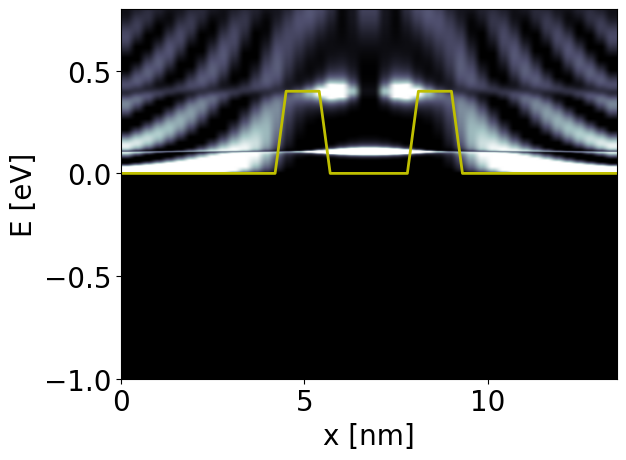

In [ ]:
visualizer.LDOS.plot()

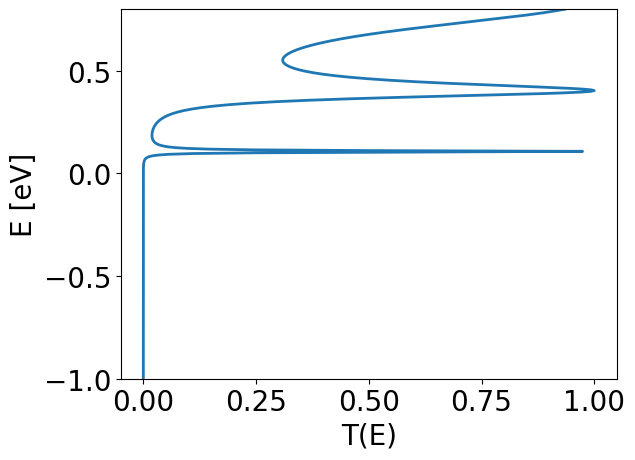

In [ ]:
visualizer.transmission.plot()

###Construção do dispositivo com "Extended"

In [ ]:
device_builder = negf.DeviceBuilder(U(0), length = length, mass = mass)
device_builder.use(self_energy_type = "extended",contact_size = 15, delta = 0.1)
device = device_builder.build()

In [ ]:
results = negf.Simulate(device, energy_vector = E)

1/1 simulations completed: # (average time per simulation: 0.574520 s)

In [ ]:
visualizer = negf.Visualize(results)

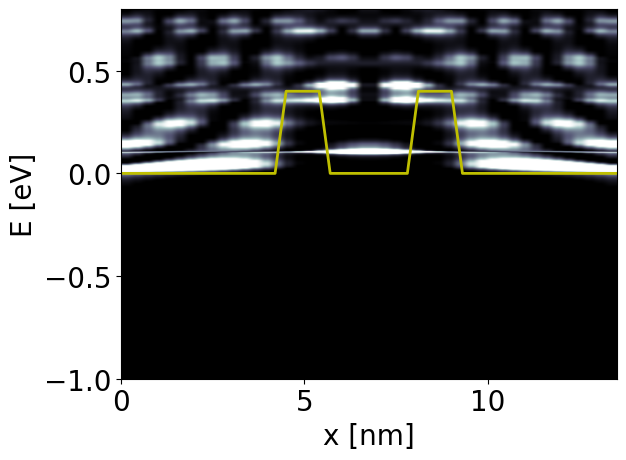

In [ ]:
visualizer.LDOS.plot()

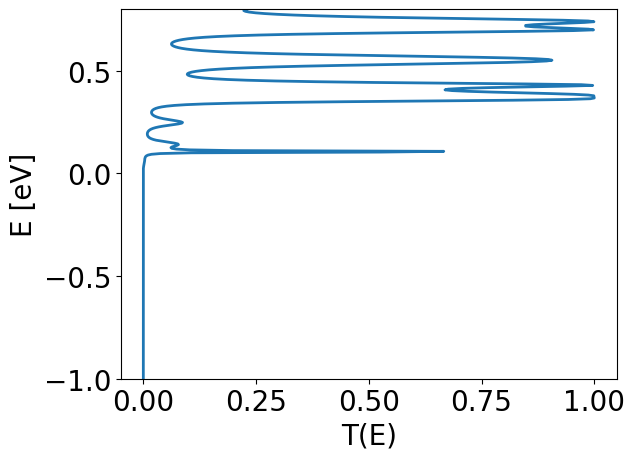

In [ ]:
visualizer.transmission.plot()

##Usando a customização da autoenergia dos ButtikerProbes para simular o efeito do bloqueio Coulomb

###Descrição do dispositivo

In [ ]:
mu_L = 0.1
mass = 0.25

U_values = [0, 0.4, 0, 0.4, 0]
layer_thickness = [4.2, 1.2, 2.4, 1.2, 4.5]
drop_fraction = [0, 1/3, 1/3, 1/3, 0]
U = negf.PiecewisePotential(U_values, layer_thickness, drop_fraction, 46)
E = np.linspace(-0.1, 0.7, 500)
length = sum(layer_thickness)
V = np.linspace(0, 0.5, 20).tolist()

###Construção do dispositivo

In [ ]:
Sigma_S = np.zeros((46, 46), dtype = complex)

device_builder = negf.DeviceBuilder(U(0), length = length, mass = mass)
device_builder.use(self_energy_type = ('end_bonded','end_bonded'), probes = [[Sigma_S]])
device = device_builder.build()

###Primeira função: Soma de funções rect (nesse caso implementado com um if-else)


####Gráfico da função

In [ ]:
def rect_func(E):
  if(E >= 0.1041 and E <= 0.1096):
    return 0.5
  elif(E >= 0.3965 and E <= 0.4020):
    return 0.5
  else:
    return 0.01

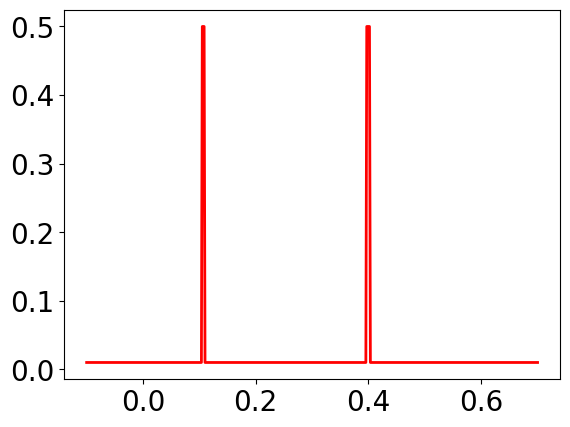

In [ ]:
yt = []
for e in E:
  yt.append(rect_func(e))
fig1, ax1 = plt.subplots()

# Plotar os dados com as personalizações
ax1.plot(E, yt, color='red', label='Analítico')
plt.show()

####Definição da função de autoenergia

In [ ]:
def sigma_rect(E):
  if(E >= 0.1041 and E <= 0.1096):
    return -1j*0.5
  elif(E >= 0.3985 and E <= 0.4040):
    return -1j*0.5
  else:
    return -1j*0.001

####Aplicando a função nos contatos

In [ ]:
custom_probe = negf.CustomSelfEnergy(device.channel)
custom_probe.set_function_at(23,23,sigma_rect)
device.contacts[2].self_energy = custom_probe

####Simulação do dispositivo

In [ ]:
results = negf.Simulate(device, energy_vector = E)

1/1 simulations completed: # (average time per simulation: 0.480831 s)

In [ ]:
visualizer = negf.Visualize(results)

####LDOS

In [ ]:
#visualizer.LDOS.plot()

####Transmissão

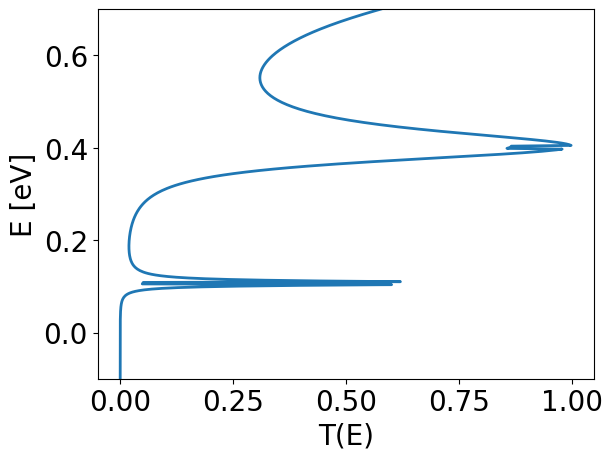

In [ ]:
visualizer.transmission.plot()

###Segunda função: Soma de funções gaussianas

####Gráfico da função

In [ ]:
def exp_gauss(E):
  return 0.5 * np.exp((-1/2)*((E-0.1075)/0.0055)**2)  + 0.5 * np.exp((-1/2)*((E-0.3985)/0.0055)**2)

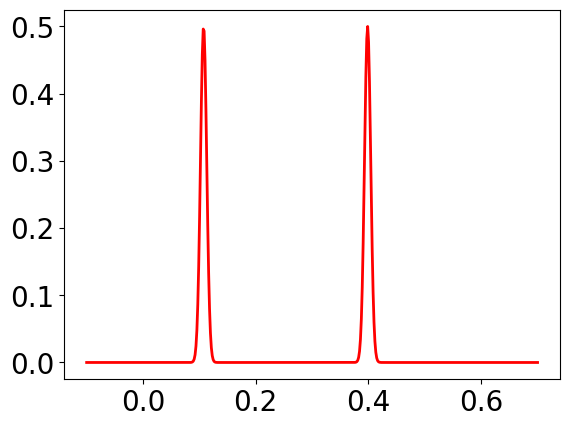

In [ ]:
yt = exp_gauss(E)
fig1, ax1 = plt.subplots()

# Plotar os dados com as personalizações
ax1.plot(E, yt, color='red', label='Analítico')
plt.show()

####Definição da função de autoenergia

In [ ]:
def sigma_gauss(E):
  return -1j*0.5 * np.exp((-1/2)*((E-0.10725)/0.0015)**2) -1j*0.5 * np.exp((-1/2)*((E-0.4)/0.0015)**2) -1j*0.001

####Aplicando a função nos contatos

In [ ]:
custom_probe = negf.CustomSelfEnergy(device.channel)
custom_probe.set_function_at(23,23,sigma_gauss)
device.contacts[2].self_energy = custom_probe

####Simulação do dispositivo

In [ ]:
results = negf.Simulate(device, energy_vector = E)

1/1 simulations completed: # (average time per simulation: 0.496321 s)

In [ ]:
visualizer = negf.Visualize(results)

####LDOS

In [ ]:
#visualizer.LDOS.plot()

####Transmissão

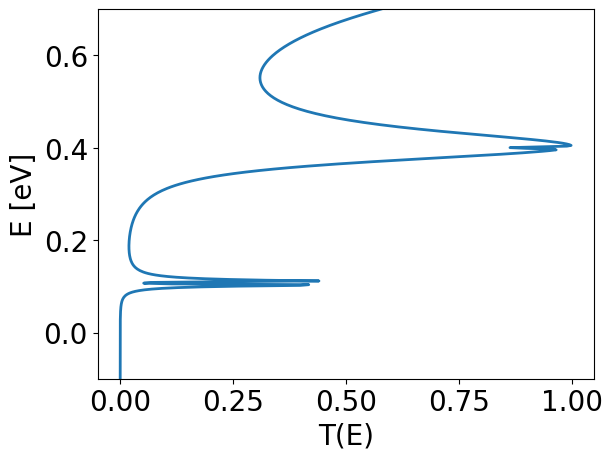

In [ ]:
visualizer.transmission.plot()

##Efeito de cada um dos contatos

###Descrição do dispositivo

In [ ]:
mu_L = 0.1
mass = 0.25

U_values = [0, 0.4, 0, 0.4, 0]
layer_thickness = [4.2, 1.2, 2.4, 1.2, 4.5]
drop_fraction = [0, 1/3, 1/3, 1/3, 0]
U = negf.PiecewisePotential(U_values, layer_thickness, drop_fraction, 46)
E = np.linspace(-1, 0.8, 500)
length = sum(layer_thickness)
V = np.linspace(0, 0.5, 20).tolist()

###Contato esquerdo (sem função no outro contato)

####Construção do dispositivo

In [ ]:
device_builder = negf.DeviceBuilder(U(0), length = length, mass = mass)
device_builder.use(self_energy_type = ('custom','end_bonded'))
device = device_builder.build()

####Definição da função de autoenergia

In [ ]:
def sigma_gauss(E):
  return -1j*0.25 * np.exp((-1/2)*((E-0.05)/0.01)**2) -1j*0.25 * np.exp((-1/2)*((E-0.1)/0.01)**2) -1j*0.25 * np.exp((-1/2)*((E-0.35)/0.01)**2) -1j*0.25 * np.exp((-1/2)*((E-0.4)/0.01)**2)

####Aplicando a função nos contatos

In [ ]:
sigma_L = device.contacts[0].self_energy
sigma_L.set_function_at(23,23,sigma_gauss)

####Simulação do dispositivo

In [ ]:
results = negf.Simulate(device, energy_vector = E)

1/1 simulations completed: # (average time per simulation: 0.395970 s)

In [ ]:
visualizer = negf.Visualize(results)

####LDOS

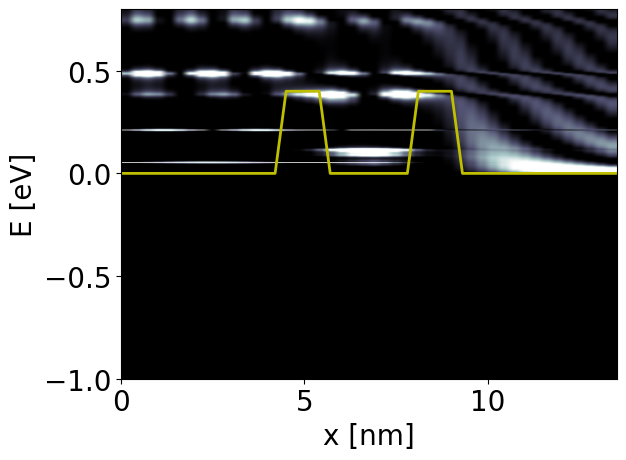

In [ ]:
visualizer.LDOS.plot()

####Transmissão

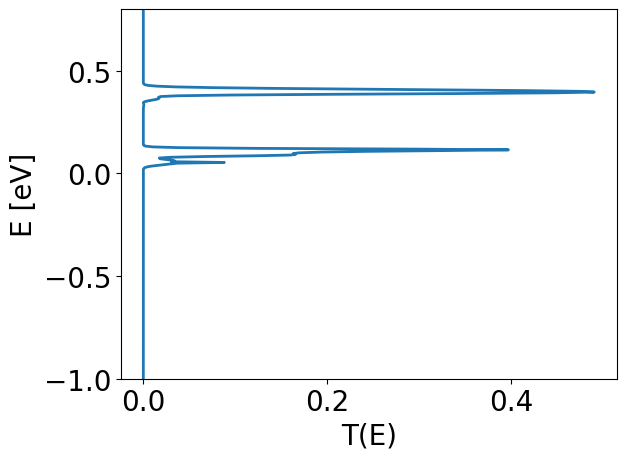

In [ ]:
visualizer.transmission.plot()

###Contato direito (sem função no outro contato)

####Construção do dispositivo

In [ ]:
device_builder = negf.DeviceBuilder(U(0), length = length, mass = mass)
device_builder.use(self_energy_type = ('end_bonded','custom'))
device = device_builder.build()

####Definição da função de autoenergia

In [ ]:
def sigma_gauss(E):
  return -1j*0.25 * np.exp((-1/2)*((E-0.05)/0.01)**2) -1j*0.25 * np.exp((-1/2)*((E-0.1)/0.01)**2) -1j*0.25 * np.exp((-1/2)*((E-0.35)/0.01)**2) -1j*0.25 * np.exp((-1/2)*((E-0.4)/0.01)**2)

####Aplicando a função nos contatos

In [ ]:
sigma_R = device.contacts[1].self_energy
sigma_R.set_function_at(23,23,sigma_gauss)

####Simulação do dispositivo

In [ ]:
results = negf.Simulate(device, energy_vector = E)

1/1 simulations completed: # (average time per simulation: 0.387257 s)

In [ ]:
visualizer = negf.Visualize(results)

####LDOS

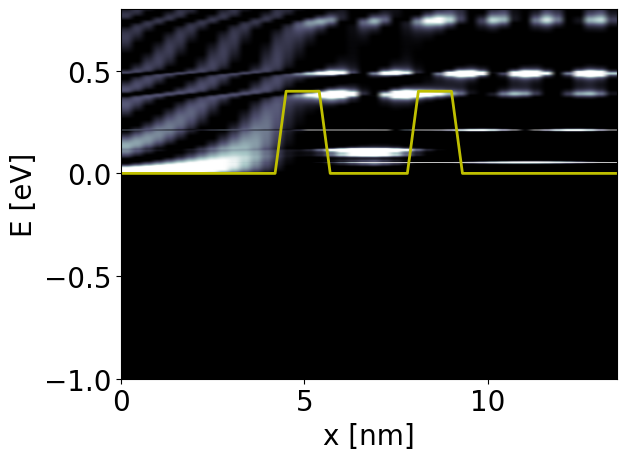

In [ ]:
visualizer.LDOS.plot()

####Transmissão

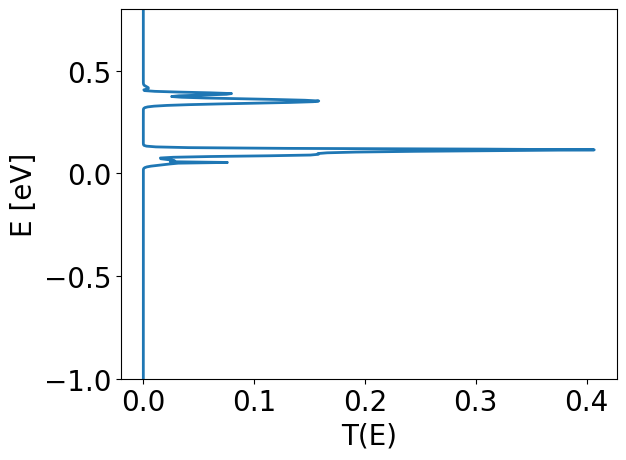

In [ ]:
visualizer.transmission.plot()

###Contato esquerdo (com função no outro contato)

####Construção do dispositivo

In [ ]:
device_builder = negf.DeviceBuilder(U(0), length = length, mass = mass)
device_builder.use(self_energy_type = ('custom','end_bonded'))
device = device_builder.build()

####Definição da função de autoenergia

In [ ]:
def sigma_gauss(E):
  return -1j*0.25 * np.exp((-1/2)*((E-0.05)/0.01)**2) -1j*0.25 * np.exp((-1/2)*((E-0.1)/0.01)**2) -1j*0.25 * np.exp((-1/2)*((E-0.35)/0.01)**2) -1j*0.25 * np.exp((-1/2)*((E-0.4)/0.01)**2)

In [ ]:
def _sigma_element(E):
    ck = 1.0 - ((E - device.channel.U_L)/(2*device.channel.H_0.t_L))
    ka = np.arccos(ck)
    return -device.channel.H_0.t_L * np.exp(1j*ka)

####Aplicando a função nos contatos

In [ ]:
sigma_L = device.contacts[0].self_energy
sigma_L.set_function_at(0,0,_sigma_element)
sigma_L.set_function_at(23,23,sigma_gauss)

####Simulação do dispositivo

In [ ]:
results = negf.Simulate(device, energy_vector = E)

1/1 simulations completed: # (average time per simulation: 0.464242 s)

In [ ]:
visualizer = negf.Visualize(results)

####LDOS

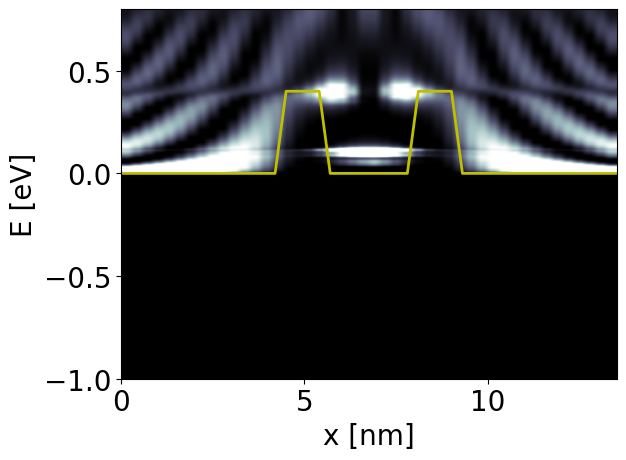

In [ ]:
visualizer.LDOS.plot()

####Transmissão

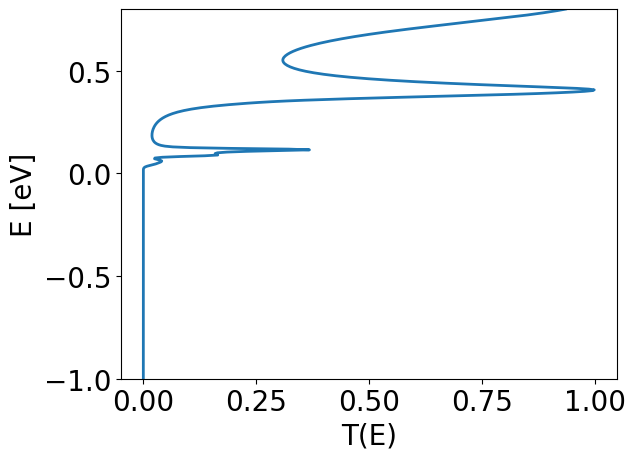

In [ ]:
visualizer.transmission.plot()

###Contato direito (com função no outro contato)

####Construção do dispositivo

In [ ]:
device_builder = negf.DeviceBuilder(U(0), length = length, mass = mass)
device_builder.use(self_energy_type = ('end_bonded','custom'))
device = device_builder.build()

####Definição da função de autoenergia

In [ ]:
def sigma_gauss(E):
  return -1j*0.25 * np.exp((-1/2)*((E-0.05)/0.01)**2) -1j*0.25 * np.exp((-1/2)*((E-0.1)/0.01)**2) -1j*0.25 * np.exp((-1/2)*((E-0.35)/0.01)**2) -1j*0.25 * np.exp((-1/2)*((E-0.4)/0.01)**2)

In [ ]:
def _sigma_element(E):
    ck = 1.0 - ((E - device.channel.U_R)/(2*device.channel.H_0.t_R))
    ka = np.arccos(ck)
    return -device.channel.H_0.t_R * np.exp(1j*ka)

####Aplicando a função nos contatos

In [ ]:
sigma_R = device.contacts[1].self_energy
sigma_R.set_function_at(23,23,sigma_gauss)
sigma_R.set_function_at(45,45,_sigma_element)

####Simulação do dispositivo

In [ ]:
results = negf.Simulate(device, energy_vector = E)

1/1 simulations completed: # (average time per simulation: 2.278114 s)

In [ ]:
visualizer = negf.Visualize(results)

####LDOS

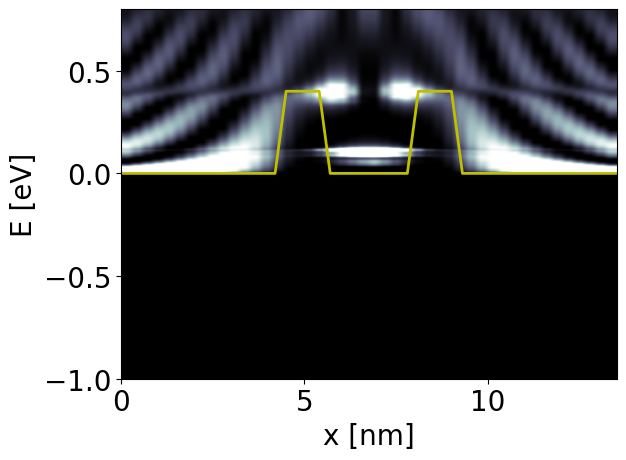

In [ ]:
visualizer.LDOS.plot()

####Transmissão

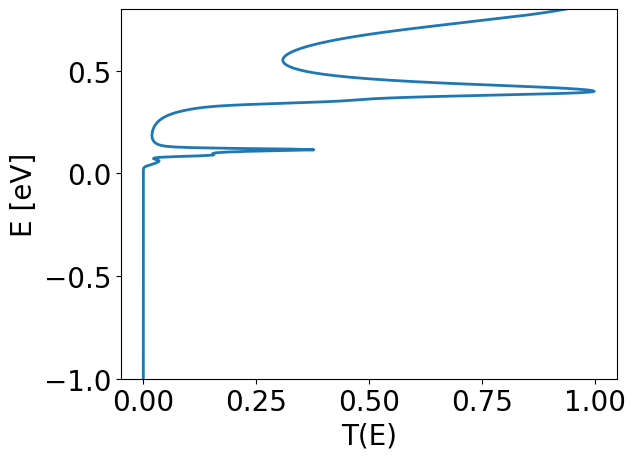

In [ ]:
visualizer.transmission.plot()

##Refinando a função de autoenergia

###Descrição do dispositivo

In [ ]:
mu_L = 0.1
mass = 0.25

U_values = [0, 0.4, 0, 0.4, 0]
layer_thickness = [4.2, 1.2, 2.4, 1.2, 4.5]
drop_fraction = [0, 1/3, 1/3, 1/3, 0]
U = negf.PiecewisePotential(U_values, layer_thickness, drop_fraction, 46)
E = np.linspace(0, 0.3, 601)
length = sum(layer_thickness)
V = np.linspace(0, 0.5, 20).tolist()

###Construção do dispositivo

In [ ]:
Sigma_S = np.zeros((46, 46), dtype = complex)

device_builder = negf.DeviceBuilder(U(0), length = length, mass = mass)
device_builder.use(self_energy_type = ('end_bonded','end_bonded'), probes = [[Sigma_S]])
device = device_builder.build()

###Melhorando a resolução da nossa função

####Gráfico da função

In [ ]:
a = 0

In [ ]:
def exp_gauss(E):
  return 0.5 * np.exp((-1/2)*((E-0.1075-a)/0.0055)**2)  + 0.5 * np.exp((-1/2)*((E-0.4-a)/0.0055)**2)

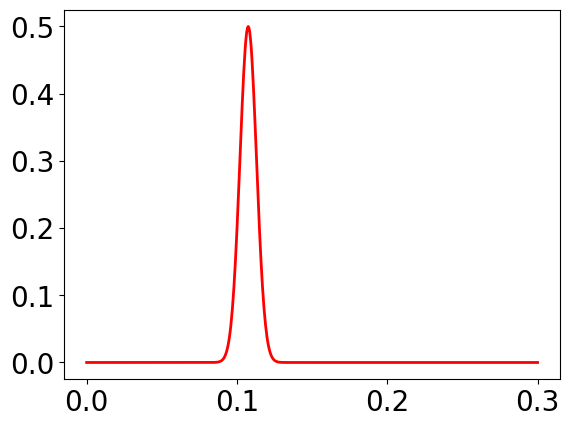

In [ ]:
yt = exp_gauss(E)
fig1, ax1 = plt.subplots()

# Plotar os dados com as personalizações
ax1.plot(E, yt, color='red', label='Analítico')
plt.show()

####Definição da função de autoenergia

In [ ]:
def sigma_gauss(E):
  return -1j*0.9 * np.exp((-1/2)*((E-0.118)/0.0055)**2) -1j*0.5 * np.exp((-1/2)*((E-0.4)/0.0055)**2) -1j*0.2

####Aplicando a função nos contatos

In [ ]:
def sigma_const(E):
  return -1j*0.2

In [ ]:
custom_probe = negf.CustomSelfEnergy(device.channel)
custom_probe.set_function_at(23,23,sigma_gauss)
device.contacts[2].self_energy = custom_probe

####Simulação do dispositivo

In [ ]:
results = negf.Simulate(device, energy_vector = E)

1/1 simulations completed: # (average time per simulation: 1.847113 s)

In [ ]:
visualizer = negf.Visualize(results)

####LDOS

In [ ]:
#visualizer.LDOS.plot()

####Transmissão

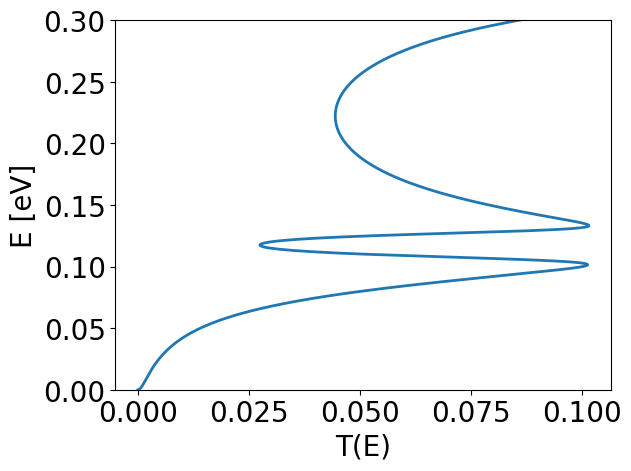

In [ ]:
visualizer.transmission.plot()

#### A capacitância, de acordo com a fórmula $\frac{q^2}{C_e} = U_0$

In [ ]:
C_e = negf.q**2/0.05
print("A capacitancia e de "+str(C_e)+"F")

A capacitancia e de 5.12e-37F


##Variando a profundidade da barreira

###Descrição do dispositivo

In [ ]:
mu_L = 0.1
mass = 0.25

layer_thickness = [4.2, 1.2, 2.4, 1.2, 4.5]
drop_fraction = [0, 0, 0, 0, 0]

E = np.linspace(-0.3, 1.5, 500)
length = sum(layer_thickness)
V = np.linspace(0, 0.5, 20).tolist()
U_list = []
a_list = []
for a in range(0, 80):
  a_list.append(a)
  U_values = [0, 0.4, 0 -0.005*a, 0.4, 0]
  U = negf.PiecewisePotential(U_values, layer_thickness, drop_fraction, 46)
  U_list.append(U)

###Construção do dispositivo

In [ ]:
device_list = []
Sigma_S = np.zeros((46, 46), dtype = complex)
for U in U_list:
  device_builder = negf.DeviceBuilder(U(0), length = length, mass = mass)
  device_builder.use(self_energy_type = ('end_bonded','end_bonded'), probes = [[Sigma_S]])
  device = device_builder.build()
  device_list.append(device)

###Simulando com nova profundidade da barreira

####Gráfico da função

In [ ]:
p1 = 0.1075
p2 = 0.4
w = 0.0015
def exp_gauss(E):
  return 0.5 * np.exp((-1/2)*((E-p1)/w)**2) + 0.5 * np.exp((-1/2)*((E-p2)/w)**2)

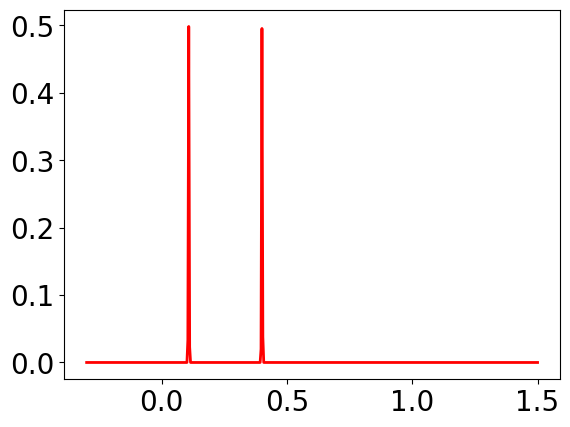

In [ ]:
yt = exp_gauss(E)
fig1, ax1 = plt.subplots()

# Plotar os dados com as personalizações
ax1.plot(E, yt, color='red', label='Analítico')
plt.show()

####Definição da função de autoenergia

In [ ]:
def deslocating_sigma_gauss(desloc):
  def sigma_gauss(E):
    return -1j*0.5 * np.exp((-1/2)*((E-p1-desloc)/w)**2) -1j*0.5 * np.exp((-1/2)*((E-p2-desloc)/w)**2) -1j*0.001
  return sigma_gauss

####Aplicando a função nos contatos

In [ ]:
for a in a_list:
  sigma_gauss = deslocating_sigma_gauss(-0.005*a)
  custom_probe = negf.CustomSelfEnergy(device_list[a].channel)
  custom_probe.set_function_at(23,23,sigma_gauss)
  device_list[a].contacts[2].self_energy = custom_probe

####Simulação do dispositivo

In [ ]:
results = negf.Simulate(device_list, energy_vector = E)

80/80 simulations completed: ################################################################################ (average time per simulation: 0.605727 s)

In [ ]:
visualizer = negf.Visualize(results)

####LDOS

In [ ]:
#visualizer.LDOS.plot(index = 7)

####Transmissão

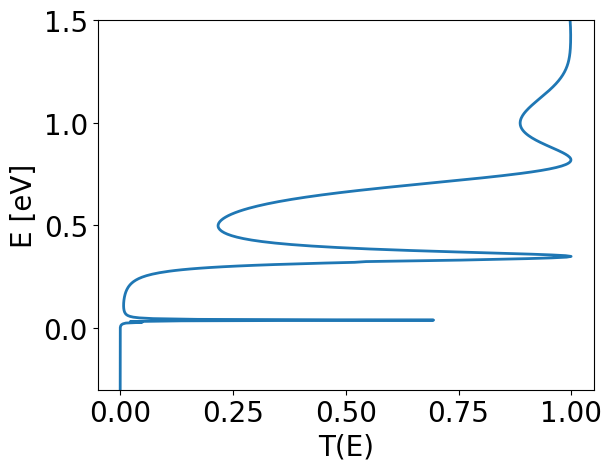

In [ ]:
visualizer.transmission.plot(index = 15)

In [ ]:
visualizer.transmission.create_gif(filename = 'trans.gif', title_vector = a_list)

/content/drive/MyDrive/Denspy/negf.py:1940: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


In [ ]:
#visualizer.LDOS.create_gif(filename = 'LDOS.gif', title_vector = a_list)

##Variando a altura da barreira

###Descrição do dispositivo

In [ ]:
mu_L = 0.1
mass = 0.25

layer_thickness = [4.2, 1.2, 2.4, 1.2, 4.5]
drop_fraction = [0, 1/3, 1/3, 1/3, 0]

E = np.linspace(-0.1, 1.7, 500)
length = sum(layer_thickness)
V = np.linspace(0, 0.5, 20).tolist()
U_list = []
a_list = []
for a in range(0,12):
  a_list.append(a)
  U_values = [0, 0.4+0.0625*a, 0, 0.4+0.0625*a, 0]
  U = negf.PiecewisePotential(U_values, layer_thickness, drop_fraction, 46)
  U_list.append(U)

###Construção do dispositivo

In [ ]:
device_list = []
Sigma_S = np.zeros((46, 46), dtype = complex)
for U in U_list:
  device_builder = negf.DeviceBuilder(U(0), length = length, mass = mass)
  device_builder.use(self_energy_type = ('end_bonded','end_bonded'), probes = [[Sigma_S]])
  device = device_builder.build()
  device_list.append(device)

###Simulando com nova altura da barreira

####Gráfico da função

In [ ]:
def exp_gauss(E):
  return 0.5 * np.exp((-1/2)*((E-0.1075)/0.0055)**2) + 0.5 * np.exp((-1/2)*((E-0.4)/0.0055)**2)

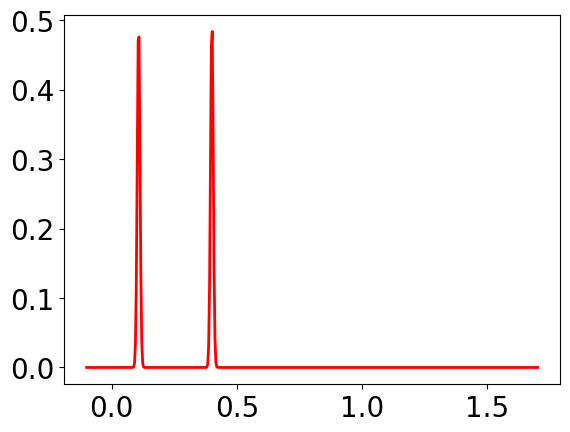

In [ ]:
yt = exp_gauss(E)
fig1, ax1 = plt.subplots()

# Plotar os dados com as personalizações
ax1.plot(E, yt, color='red', label='Analítico')
plt.show()

####Definição da função de autoenergia

In [ ]:
def sigma_gauss(E):
  return -1j*0.5 * np.exp((-1/2)*((E-0.10725)/0.0015)**2) -1j*0.5 * np.exp((-1/2)*((E-0.4)/0.0015)**2) -1j*0.001

####Aplicando a função nos contatos

In [ ]:
for device in device_list:
  custom_probe = negf.CustomSelfEnergy(device.channel)
  custom_probe.set_function_at(23,23,sigma_gauss)
  device.contacts[2].self_energy = custom_probe

####Simulação do dispositivo

In [ ]:
results = negf.Simulate(device_list, energy_vector = E)

12/12 simulations completed: ############ (average time per simulation: 0.758543 s)

In [ ]:
visualizer = negf.Visualize(results)

####LDOS

In [ ]:
#visualizer.LDOS.plot(index = 5)

####Transmissão

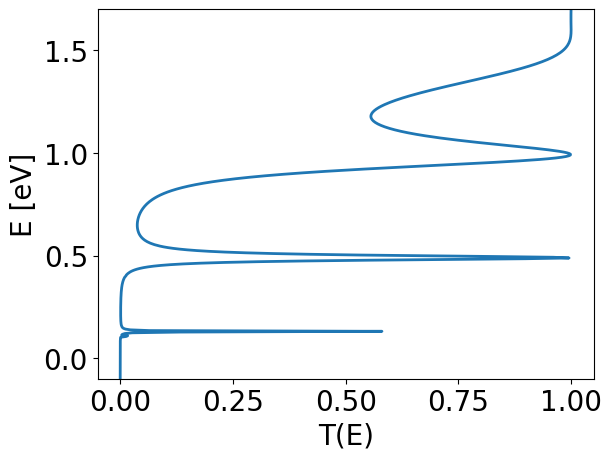

In [ ]:
visualizer.transmission.plot(index = 5)

In [ ]:
visualizer.transmission.create_gif(filename = 'trans2.gif', title_vector = a_list)

In [ ]:
#visualizer.LDOS.create_gif(filename = 'LDOS2.gif', title_vector = a_list)

##Investigando a corrente numa ilha com bloqueio Coulomb



### Com base na tensão de porta

####Descrição do dispositivo

In [ ]:
mu_L = 0.05
mass = 0.25

layer_thickness = [4.2, 1.2, 2.4, 1.2, 4.5]
drop_fraction = [0, 0, 0, 0, 0]

E = np.linspace(-0.3, 1.5, 500)
length = sum(layer_thickness)
V = np.linspace(0, 0.5, 20).tolist()
U_list = []
dist_step = 0.00125
dist_list = np.arange(0,0.15,dist_step)

for dist in dist_list:
  U_values = [0, 0.5, 0 -dist, 0.5, 0]
  U = negf.PiecewisePotential(U_values, layer_thickness, drop_fraction, 46)
  U_list.append(U)

####Construção do dispositivo

In [ ]:
device_list = []
Sigma_S = np.zeros((46, 46), dtype = complex)
for U in U_list:
  device_builder = negf.DeviceBuilder(U(0), length = length, mass = mass)
  device_builder.use(mu_L = mu_L,voltage = 0.01,self_energy_type = ('end_bonded','end_bonded'),probes = [[Sigma_S]], temperature = 10)
  device = device_builder.build()
  device_list.append(device)

####Simulando com nova profundidade da barreira

#####Gráfico da função

In [ ]:
p1 = 0.118
p2 = 0.4
w = 0.0055
def exp_gauss(E):
  return 0.9 * np.exp((-1/2)*((E-p1)/w)**2) + 0.9 * np.exp((-1/2)*((E-p2)/w)**2)

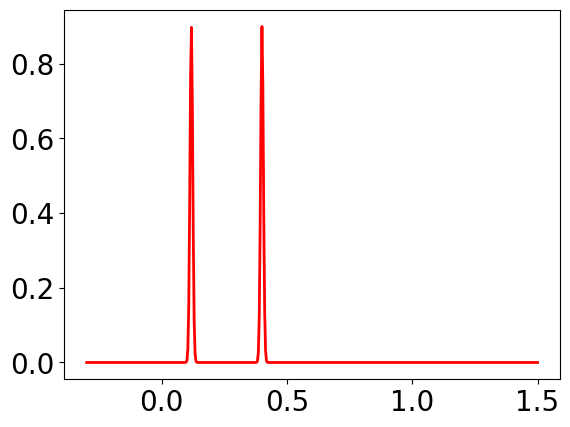

In [ ]:
yt = exp_gauss(E)
fig1, ax1 = plt.subplots()

# Plotar os dados com as personalizações
ax1.plot(E, yt, color='red', label='Analítico')
plt.show()

#####Definição da função de autoenergia

In [ ]:
def deslocating_sigma_gauss(desloc):
  def sigma_gauss(E):
    return -1j*0.9 * np.exp((-1/2)*((E-p1-desloc)/w)**2) -1j*0.9 * np.exp((-1/2)*((E-p2-desloc)/w)**2) -1j*0.001
  return sigma_gauss

#####Aplicando a função nos contatos

In [ ]:
print(len(U_list))

120


In [ ]:
for dist_index in range(len(dist_list)):
  sigma_gauss = deslocating_sigma_gauss(-dist_list[dist_index])
  custom_probe = negf.CustomSelfEnergy(device_list[dist_index].channel)
  custom_probe.set_function_at(23,23,sigma_gauss)
  device_list[dist_index].contacts[2].self_energy = custom_probe

#####Simulação do dispositivo

In [ ]:
results = negf.Simulate(device_list, energy_vector = E)

1/120 simulations completed: #----------------------------------------------------------------------------------------------------------------------- (average time per simulation: 1.802463 s)

/content/drive/MyDrive/Denspy/negf.py:358: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp((E - self.mu)/(self.k * self.T)))


120/120 simulations completed: ######################################################################################################################## (average time per simulation: 0.586911 s)

In [ ]:
visualizer = negf.Visualize(results)

#####LDOS

In [ ]:
#visualizer.LDOS.plot(index = 55)

#####Transmissão

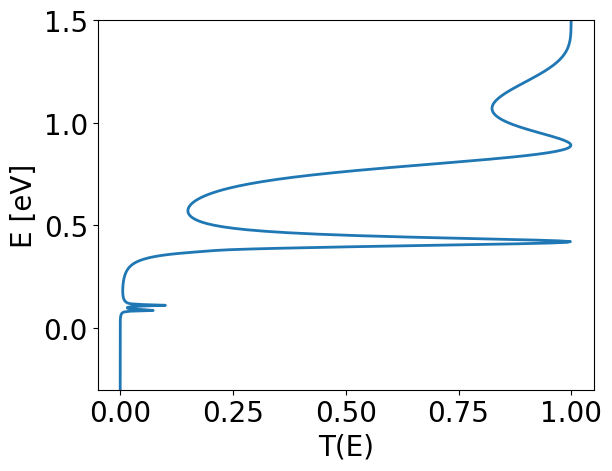

In [ ]:
visualizer.transmission.plot(index = 15)

In [ ]:
visualizer.transmission.create_gif(filename = 'trans3.gif', title_vector = dist_list)

/content/drive/MyDrive/Denspy/negf.py:1940: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


In [ ]:
#visualizer.LDOS.create_gif(filename = 'LDOS3.gif', title_vector = a_list)

Text(0.5, 0, 'Gate voltage [V]')

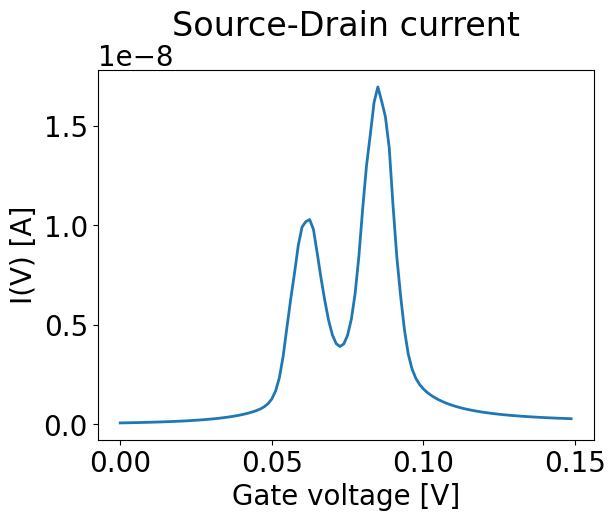

In [ ]:
current_values_10k = []
for dist_index in range(len(dist_list)):
  current_values_10k.append(negf.SimulationQuantities(results.simulations[dist_index]).get_current())
plt.plot(dist_list,current_values_10k)
plt.title("Source-Drain current")
plt.ylabel("I(V) [A]")
plt.xlabel("Gate voltage [V]")

#### Com outra temperatura (T = 60K) :



#####Construção do dispositivo

In [ ]:
device_list = []
Sigma_S = np.zeros((46, 46), dtype = complex)
for U in U_list:
  device_builder = negf.DeviceBuilder(U(0), length = length, mass = mass)
  device_builder.use(mu_L = mu_L,voltage = 0.01,self_energy_type = ('end_bonded','end_bonded'),probes = [[Sigma_S]], temperature = 60)
  device = device_builder.build()
  device_list.append(device)

#####Aplicando a função nos contatos

In [ ]:
for dist_index in range(len(dist_list)):
  sigma_gauss = deslocating_sigma_gauss(-dist_list[dist_index])
  custom_probe = negf.CustomSelfEnergy(device_list[dist_index].channel)
  custom_probe.set_function_at(23,23,sigma_gauss)
  device_list[dist_index].contacts[2].self_energy = custom_probe

#####Simulação do dispositivo

In [ ]:
results = negf.Simulate(device_list, energy_vector = E)

120/120 simulations completed: ######################################################################################################################## (average time per simulation: 0.598629 s)

In [ ]:
visualizer = negf.Visualize(results)

#####Transmissão

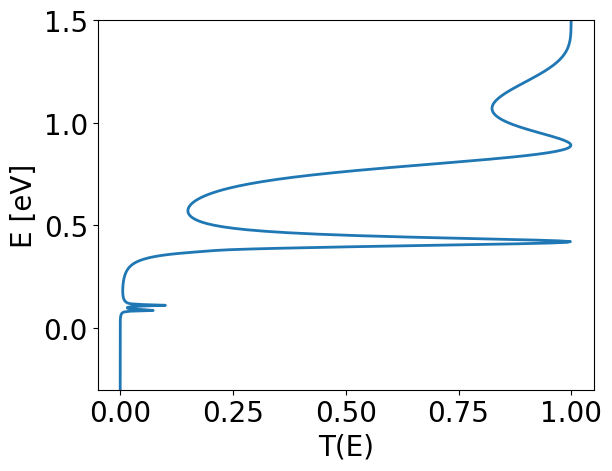

In [ ]:
visualizer.transmission.plot(index = 15)

In [ ]:
#visualizer.LDOS.create_gif(filename = 'LDOS3.gif', title_vector = a_list)

Text(0.5, 0, 'Gate voltage [V]')

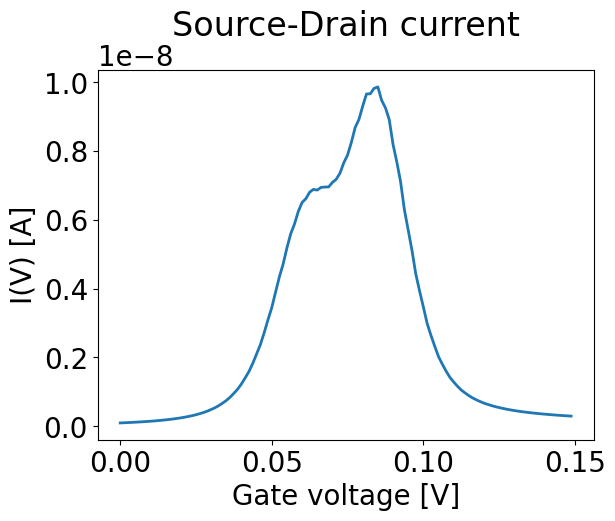

In [ ]:
current_values_60k = []
for dist_index in range(len(dist_list)):
  current_values_60k.append(negf.SimulationQuantities(results.simulations[dist_index]).get_current())
plt.plot(dist_list,current_values_60k)
plt.title("Source-Drain current")
plt.ylabel("I(V) [A]")
plt.xlabel("Gate voltage [V]")

Text(0.5, 0, 'Gate voltage [V]')

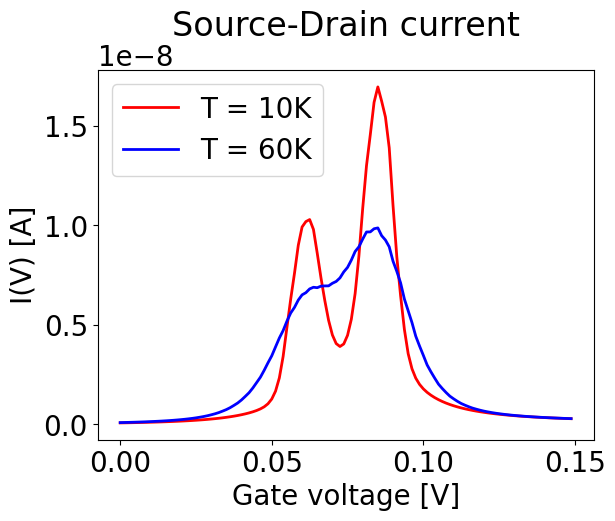

In [ ]:
plt.plot(dist_list,current_values_10k, color = 'r', label = 'T = 10K')
plt.plot(dist_list,current_values_60k, color = 'b', label = 'T = 60K')
plt.legend()
plt.title("Source-Drain current")
plt.ylabel("I(V) [A]")
plt.xlabel("Gate voltage [V]")

### Com base na tensão fonte-dreno

####Descrição do dispositivo

In [ ]:
mu_L = 0.25
mass = 0.25

layer_thickness = [4.2, 1.2, 2.4, 1.2, 4.5]
drop_fraction = [0, 0, 0, 0, 0]

E = np.linspace(-0.3, 1.5, 500)
length = sum(layer_thickness)
V = np.linspace(0, 0.5, 20).tolist()
U_values = [0, 0.5, 0, 0.5, 0]
U = negf.PiecewisePotential(U_values, layer_thickness, drop_fraction, 46)


####Construção do dispositivo

In [ ]:
dist_step = 0.00125
dist_list = np.arange(0,0.15,dist_step)
device_list = []
Sigma_S = np.zeros((46, 46), dtype = complex)
for dist in dist_list:
  device_builder = negf.DeviceBuilder(U(0), length = length, mass = mass)
  device_builder.use(mu_L = mu_L,voltage = dist,self_energy_type = ('end_bonded','end_bonded'),probes = [[Sigma_S]], temperature = 10)
  device = device_builder.build()
  device_list.append(device)

####Simulando com nova profundidade da barreira

#####Gráfico da função

In [ ]:
p1 = 0.118
p2 = 0.4
w = 0.0055
def exp_gauss(E):
  return 0.9 * np.exp((-1/2)*((E-p1)/w)**2) + 0.9 * np.exp((-1/2)*((E-p2)/w)**2)

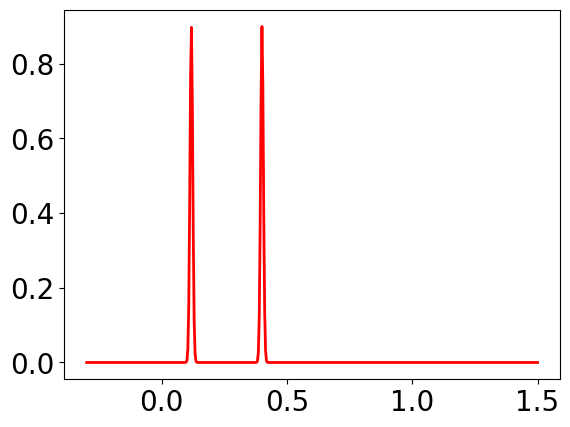

In [ ]:
yt = exp_gauss(E)
fig1, ax1 = plt.subplots()

# Plotar os dados com as personalizações
ax1.plot(E, yt, color='red', label='Analítico')
plt.show()

#####Definição da função de autoenergia

In [ ]:
def sigma_gauss(E):
  return -1j*0.9 * np.exp((-1/2)*((E-p1)/w)**2) -1j*0.9 * np.exp((-1/2)*((E-p2)/w)**2) -1j*0.001

#####Aplicando a função nos contatos

In [ ]:
for dist_index in range(len(dist_list)):
  custom_probe = negf.CustomSelfEnergy(device_list[dist_index].channel)
  custom_probe.set_function_at(23,23,sigma_gauss)
  device_list[dist_index].contacts[2].self_energy = custom_probe

#####Simulação do dispositivo

In [ ]:
results = negf.Simulate(device_list, energy_vector = E)

1/120 simulations completed: #----------------------------------------------------------------------------------------------------------------------- (average time per simulation: 0.483736 s)

/content/drive/MyDrive/Denspy/negf.py:358: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp((E - self.mu)/(self.k * self.T)))


120/120 simulations completed: ######################################################################################################################## (average time per simulation: 0.663226 s)

In [ ]:
visualizer = negf.Visualize(results)

#####LDOS

In [ ]:
#visualizer.LDOS.plot(index = 55)

#####Transmissão

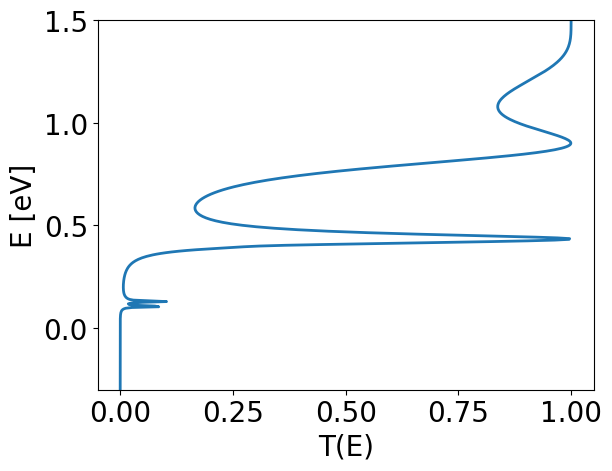

In [ ]:
visualizer.transmission.plot(index = 110)

In [ ]:
visualizer.transmission.create_gif(filename = 'trans4.gif', title_vector = dist_list)

In [ ]:
#visualizer.LDOS.create_gif(filename = 'LDOS3.gif', title_vector = a_list)

Text(0.5, 0, 'Gate voltage [V]')

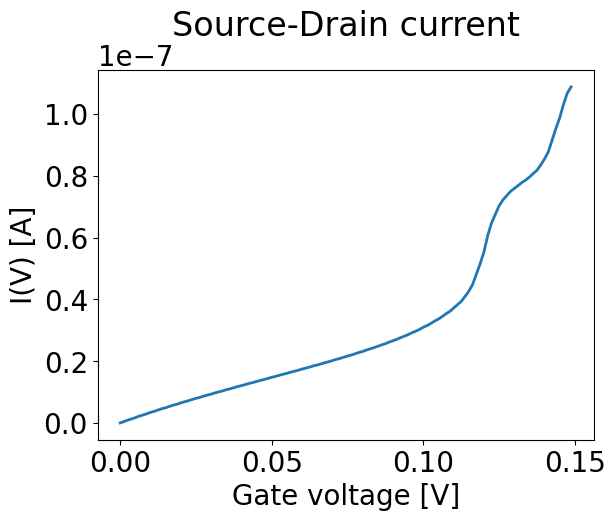

In [ ]:
current_values_10k = []
for dist_index in range(len(dist_list)):
  current_values_10k.append(negf.SimulationQuantities(results.simulations[dist_index]).get_current())
plt.plot(dist_list,current_values_10k)
plt.title("Source-Drain current")
plt.ylabel("I(V) [A]")
plt.xlabel("Drain voltage [V]")

#### Com outra temperatura (T = 60K) :



#####Construção do dispositivo

In [ ]:
device_list = []
Sigma_S = np.zeros((46, 46), dtype = complex)
for dist in dist_list:
  device_builder = negf.DeviceBuilder(U(0), length = length, mass = mass)
  device_builder.use(mu_L = mu_L,voltage = dist,self_energy_type = ('end_bonded','end_bonded'),probes = [[Sigma_S]], temperature = 60)
  device = device_builder.build()
  device_list.append(device)

#####Aplicando a função nos contatos

In [ ]:
for dist_index in range(len(dist_list)):
  custom_probe = negf.CustomSelfEnergy(device_list[dist_index].channel)
  custom_probe.set_function_at(23,23,sigma_gauss)
  device_list[dist_index].contacts[2].self_energy = custom_probe

#####Simulação do dispositivo

In [ ]:
results = negf.Simulate(device_list, energy_vector = E)

120/120 simulations completed: ######################################################################################################################## (average time per simulation: 0.749729 s)

In [ ]:
visualizer = negf.Visualize(results)

#####Transmissão

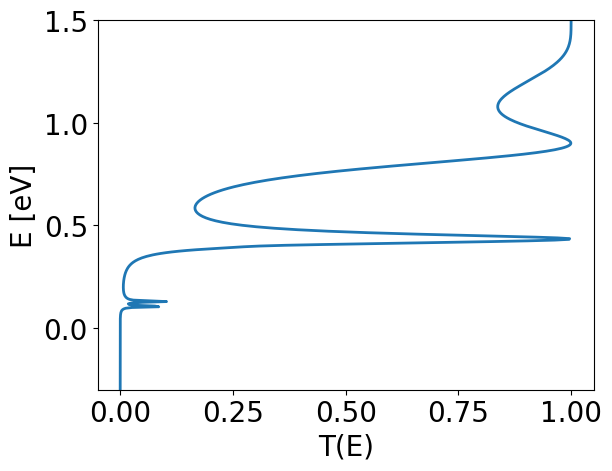

In [ ]:
visualizer.transmission.plot(index = 15)

In [ ]:
#visualizer.LDOS.create_gif(filename = 'LDOS3.gif', title_vector = a_list)

Text(0.5, 0, 'Drain voltage [V]')

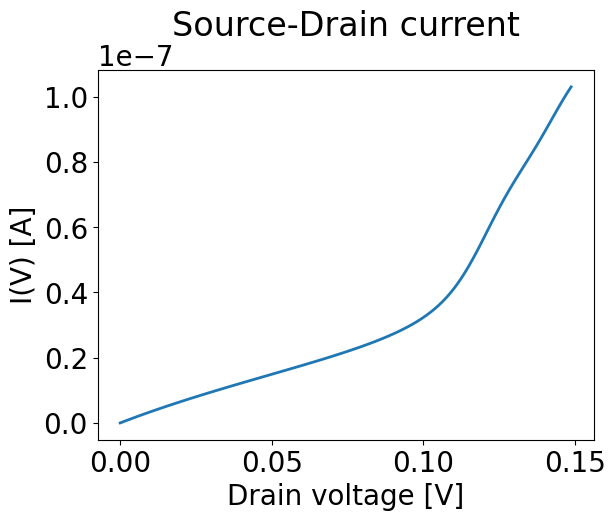

In [ ]:
current_values_60k = []
for dist_index in range(len(dist_list)):
  current_values_60k.append(negf.SimulationQuantities(results.simulations[dist_index]).get_current())
plt.plot(dist_list,current_values_60k)
plt.title("Source-Drain current")
plt.ylabel("I(V) [A]")
plt.xlabel("Drain voltage [V]")

Text(0.5, 0, 'Drain voltage [V]')

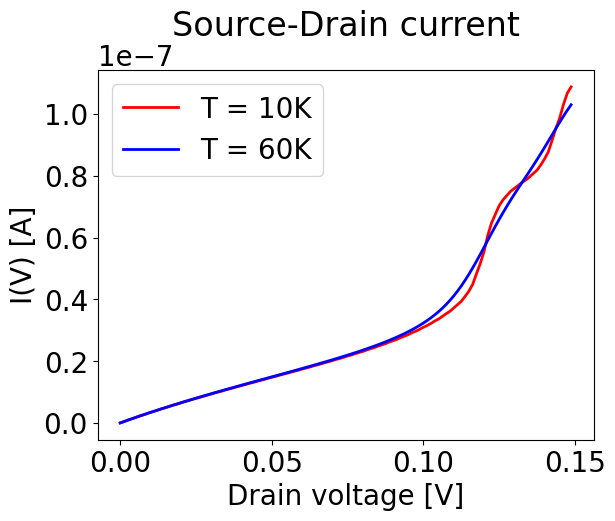

In [ ]:
plt.plot(dist_list,current_values_10k, color = 'r', label = 'T = 10K')
plt.plot(dist_list,current_values_60k, color = 'b', label = 'T = 60K')
plt.legend()
plt.title("Source-Drain current")
plt.ylabel("I(V) [A]")
plt.xlabel("Drain voltage [V]")

#### Com outra energia de separação :



#####Descrição do dispositivo

In [ ]:
mu_L = 0.25
mass = 0.25

layer_thickness = [4.2, 1.2, 2.4, 1.2, 4.5]
drop_fraction = [0, 0, 0, 0, 0]

E = np.linspace(-0.3, 1.5, 500)
length = sum(layer_thickness)
V = np.linspace(0, 0.5, 20).tolist()
U_values = [0, 0.5, 0, 0.5, 0]
U = negf.PiecewisePotential(U_values, layer_thickness, drop_fraction, 46)


#####Construção do dispositivo

In [ ]:
device_lists = []
dist_step = 0.00125
dist_list = np.arange(0,0.2,dist_step)
desloc_step = 0.0020
desloc_list =  np.arange(0,0.01,desloc_step)
Sigma_S = np.zeros((46, 46), dtype = complex)
for desloc in desloc_list:
  device_list = []
  for dist in dist_list:
    device_builder = negf.DeviceBuilder(U(0), length = length, mass = mass)
    device_builder.use(mu_L = mu_L,voltage = dist,self_energy_type = ('end_bonded','end_bonded'),probes = [[Sigma_S]], temperature = 10)
    device = device_builder.build()
    device_list.append(device)
  device_lists.append(device_list)

#####Aplicando a função nos contatos

In [ ]:
p1 = 0.118
p2 = 0.4
w = 0.0015 #valor a ser variado

In [ ]:
def deslocating_sigma_gauss(desloc):
  def sigma_gauss(E):
    return -1j*0.9 * np.exp((-1/2)*((E-p1)/(w+desloc))**2) -1j*0.9 * np.exp((-1/2)*((E-p2-desloc)/(w+desloc))**2) -1j*0.001
  return sigma_gauss

In [ ]:
for desloc_index in range(len(desloc_list)):
  sigma_gauss = deslocating_sigma_gauss(desloc_list[desloc_index])
  for dist_index in range(len(dist_list)):
    custom_probe = negf.CustomSelfEnergy(device_lists[desloc_index][dist_index].channel)
    custom_probe.set_function_at(23,23,sigma_gauss)
    device_lists[desloc_index][dist_index].contacts[2].self_energy = custom_probe

#####Simulação do dispositivo

In [ ]:
results = []
for device_list in device_lists:
  results.append(negf.Simulate(device_list, energy_vector = E))

1/160 simulations completed: #--------------------------------------------------------------------------------------------------------------------------------------------------------------- (average time per simulation: 0.682755 s)

/content/drive/MyDrive/Denspy/negf.py:358: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp((E - self.mu)/(self.k * self.T)))


160/160 simulations completed: ################################################################################################################################################################ (average time per simulation: 0.577382 s)

In [ ]:
visualizer = []
for result in results:
  visualizer.append(negf.Visualize(result))

#####Transmissão

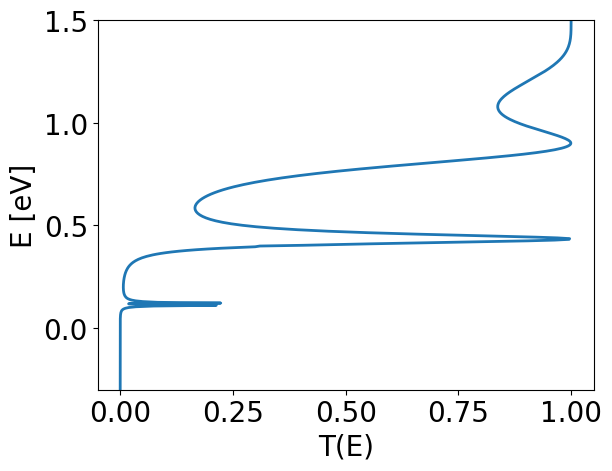

In [ ]:
visualizer[0].transmission.plot(index = 159)

In [ ]:
#visualizer.LDOS.create_gif(filename = 'LDOS3.gif', title_vector = a_list)

Text(0.5, 0, 'Drain voltage [V]')

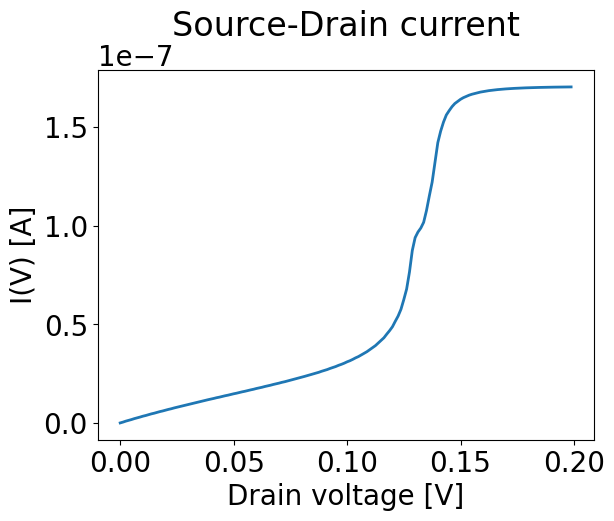

In [ ]:
current_values_list = []
for result in results:
  current_values = []
  for dist_index in range(len(dist_list)):
    current_values.append(negf.SimulationQuantities(result.simulations[dist_index]).get_current())
  current_values_list.append(current_values)
plt.plot(dist_list,current_values_list[0])
plt.title("Source-Drain current")
plt.ylabel("I(V) [A]")
plt.xlabel("Drain voltage [V]")

Text(0.5, 0, 'Drain voltage [V]')

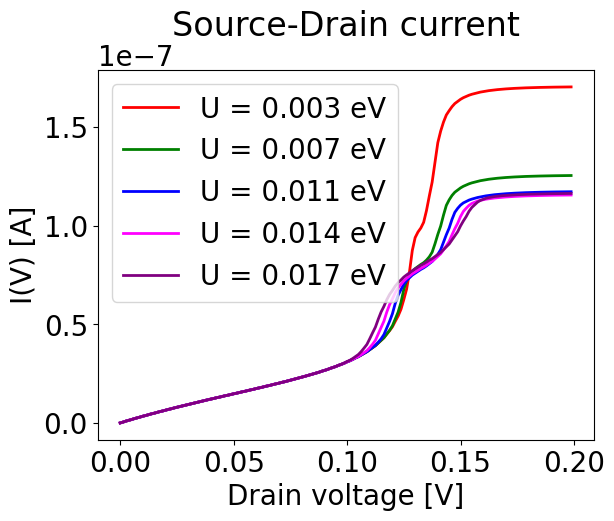

In [ ]:
plt.plot(dist_list,current_values_list[0], color = 'red', label = 'U = 0.003 eV')
plt.plot(dist_list,current_values_list[1], color = 'green', label = 'U = 0.007 eV')
plt.plot(dist_list,current_values_list[2], color = 'blue', label = 'U = 0.011 eV')
plt.plot(dist_list,current_values_list[3], color = 'magenta', label = 'U = 0.014 eV')
plt.plot(dist_list,current_values_list[4], color = 'purple', label = 'U = 0.017 eV')
plt.legend()
plt.title("Source-Drain current")
plt.ylabel("I(V) [A]")
plt.xlabel("Drain voltage [V]")

In [ ]:
print(desloc_list)


[0.    0.002 0.004 0.006 0.008]


###

###